# Unimodality

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from utils.metrics import rel_err, rank_corr, mse_K
from numba import autojit

In [2]:
url = 'https://s3-eu-west-1.amazonaws.com/nphc-data/d10_2blocks_sym_with_Beta.pkl.gz'
from utils.loader import load_data
cumul, Beta = load_data(url)

... loading data


## NPHC2

In [3]:
from nphc2.solver import admm
from utils.prox import *
d = cumul.dim
X0 = np.eye(d)
from scipy.linalg import inv
Alpha_true = np.eye(d) - inv(cumul.R_true)
#X0 = np.ones(d**2).reshape(d,d)
rho = .01
maxiter = 10000

In [4]:
res = []
for prox in [prox_sq_frob, prox_l1, prox_nuclear]:
    X_ = admm(cumul, prox, X0, X0, Alpha_true, rho=rho, maxiter=maxiter)
    res.append(X_)
for prox in [prox_sq_frob, prox_l1, prox_nuclear]:
    X_ = admm(cumul, prox, X0, X0, Alpha_true, rho=rho, maxiter=maxiter,positivity=False)
    res.append(X_)

In [5]:
X_frob = res[0]
X_l1 = res[1]
X_nuc = res[2]
X_frob_pos_false = res[3]
X_l1_pos_false = res[4]
X_nuc_pos_false = res[5]

In [8]:
from utils.metrics import rel_err, rank_corr
import pandas as pd
cols = ['RelErr', 'RankCorr']
index = ['frobenius', '\ell_1', 'nuclear norm','frobenius_pos_false', '\ell_1_pos_false', 'nuclear norm_pos_false']
results = np.zeros((len(index),len(cols)))
for i, X in enumerate([X_frob, X_l1, X_nuc,X_frob_pos_false, X_l1_pos_false, X_nuc_pos_false]):
    results[i][0] = rel_err(Alpha_true, X)
    results[i][1] = rank_corr(Alpha_true, X)
df = pd.DataFrame(results, index=index, columns=cols)
df

,RelErr,RankCorr
frobenius,0.026534,0.364122
\ell_1,0.418686,0.403068
nuclear norm,0.016968,0.341135
frobenius_pos_false,0.009818,0.365257
\ell_1_pos_false,0.387893,0.403068
nuclear norm_pos_false,0.009977,0.365257


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


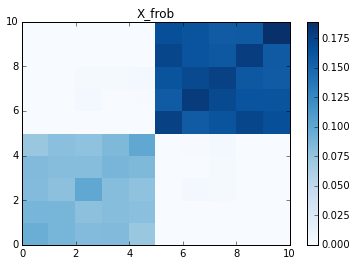

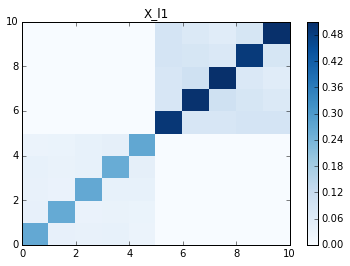

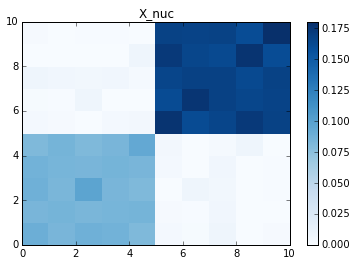

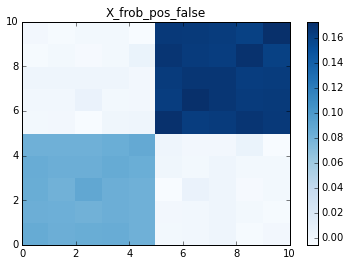

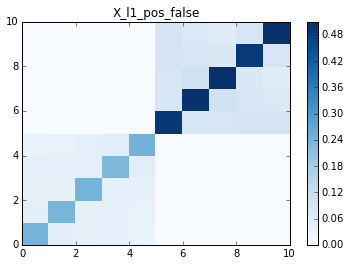

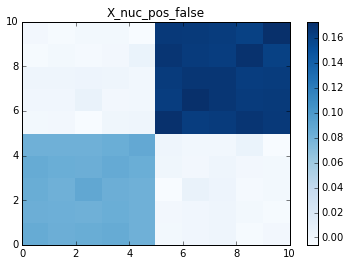

In [7]:
for i,X in enumerate(res):
    plt.pcolor(X,cmap=plt.cm.Blues)
    if i == 0:
        title = 'X_frob'
    elif i == 1:
        title = 'X_l1'
    elif i == 2:
        title = 'X_nuc'
    elif i == 3:
        title = 'X_frob_pos_false'
    elif i == 4:
        title = 'X_l1_pos_false'
    else:
        title = 'X_nuc_pos_false'
    plt.title(title)
    plt.colorbar()
    plt.show()
    plt.close()